**логистическая регрессия**  
метод градиентного спуска,  
линейный классификатор


Евгений Борисов borisov.e@solarl.ru

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing   import MinMaxScaler

---

In [2]:
def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
# загружаем даные
data = [
    np.loadtxt('../data/200_2b/points_1.txt'),
    np.loadtxt('../data/200_2b/points_2.txt')
]

In [4]:
# # загружаем даные
# data = [
#     np.loadtxt('data/1998_2/points_b.txt'),
#     np.loadtxt('data/1998_2/points_r.txt')
# ]

In [5]:
# собираем вместе
X_train = np.vstack(data)

n_cls = len(data) # количество классов
n_cls

2

In [6]:
# метки классов
y_train = [ [i]*data[i].shape[0] for i in range(n_cls)]
y_train = [ item for sublist in y_train for item in sublist ]
y_train = np.asarray(y_train)

In [7]:
X_train.shape, y_train.shape

((200, 2), (200,))

In [28]:
# y_train

In [8]:
%xdel data

In [9]:
# нормируем данные
X_train = MinMaxScaler([-1.0,1.0]).fit_transform(X_train)

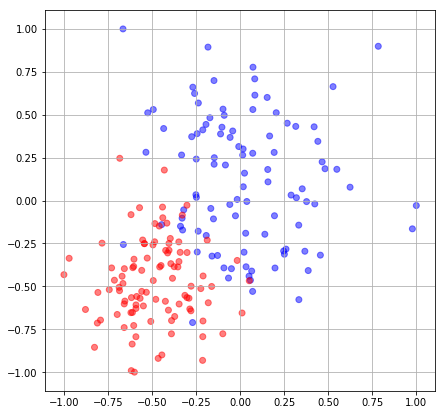

In [10]:
c = [ ['b','r'][int(j>0.5)] for j in y_train  ]
plt.figure(figsize=(7,7))
plt.scatter( x=X_train[:,0], y=X_train[:,1], c=c,  alpha=0.5 )
plt.grid()
plt.show()


---

In [11]:
# собираем полином
n_ex = X_train.shape[0] # количество примеров 
Xp = np.hstack( [ np.ones([n_ex,1]) , X_train ] )
n_par = Xp.shape[1] # количество параметров

Xp.shape

(200, 3)

In [12]:
def act(z): 
    return 1.0/(1.0 + np.exp(-z))

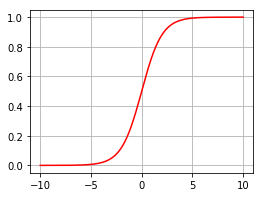

In [13]:
plt.figure(figsize=(4,3))
z=np.linspace(-10,10,500)
plt.plot( z,act(z),'-r' )
plt.grid()
plt.show()

In [14]:
# инициализация параметров
np.random.seed(get_seed())
T = np.random.normal(loc=0.0, scale=0.1, size=n_par)
T

array([-0.00519642, -0.01111961,  0.10417968])

In [15]:
# ф-ция потери - кросс-энтропия
def loss(o,y):
    o_restr = np.minimum(0.99999,np.maximum(1e-9,o))
    return -( y*np.log(o_restr) + (1-y)*np.log(1.0-o_restr) ).sum() / y.shape[0]    

In [16]:
# def CrossEntropy(o, y): return -log(o) if (y == 1)  else -log(1.0 - o)

In [17]:
# метод градиентного спуска

a=0.1 # скорость обучения

MAX_ITER = 500 # максимальное число циклов обучения
MIN_ERROR = 0.17 # порог минимальной ошибки

er_hist = [] # история ошибки

In [18]:
for i in range(MAX_ITER):
    
    O = act(Xp.dot(T)) # выход
    E = O - y_train # ошибка
    
    er_hist.append( loss(O,y_train) ) # значение ф-ции потери     
    
    if er_hist[-1] < MIN_ERROR: # проверяем достижение порога
        print(i,'min error ',er_hist[-1])
        break
    
    dE = Xp.T.dot(E)
    #dE /= np.linalg.norm(dE) # нормируем градиент
    
    T = T - a*dE
   

41 min error  0.1699352531013499


In [19]:
print(T)
print(len(er_hist),er_hist[-1])

[-3.89299717 -9.44931952 -6.64166814]
42 0.1699352531013499


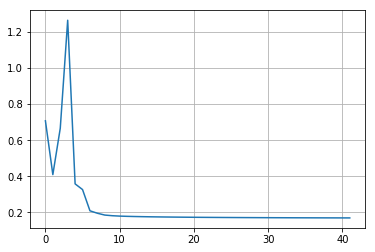

In [20]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [21]:
score_bound=0.5
o = act(Xp.dot(T))

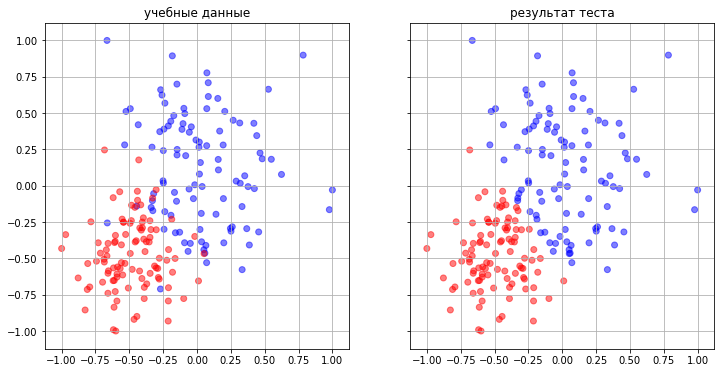

In [22]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
c = [ ['b','r'][int(j>0.5)] for j in y_train  ]
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X_train[:,0], y=X_train[:,1], c=c,  alpha=0.5 )
axarr[0].grid()

c = [ ['b','r'][int(j>score_bound)] for j in o  ]
axarr[1].set_title('результат теста')
axarr[1].scatter( x=X_train[:,0], y=X_train[:,1], c=c,  alpha=0.5 )
axarr[1].grid()

plt.show()
